# <b><span style='color:#F1A424'>AutoML - Binary Classification - Breast Cancer Prediction </span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Dataset used - Breast Cancer Dataset**

**Features**:

- `ID number`
-  `Diagnosis` : (M = malignant, B = benign)

- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

- The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

- All feature values are recoded with four significant digits.

- Missing attribute values: none


**Target Variable**:

- `diagnosis`: 357 benign, 212 malignant

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the type of cancer i.e., benign and malignant.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with customized train size i.e., 0.75.
- Outlier filteration and handling using method 'percentile' with customized upper and lower bound value. Use replacement value for features 'area_se' and 'radius_se' with 'delete' and 'median'.
- Feature scaling with method 'midrange'.



In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','breast_cancer')

In [5]:
# Fetching in teradata dataframe
cancer_df = DataFrame("breast_cancer")

In [6]:
# first 5 rows
cancer_df.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [7]:
# cancer_df dataset
cancer_df.shape

(569, 32)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
cancer_df_sample = cancer_df.sample(frac = [0.8, 0.2])

In [9]:
cancer_df_sample.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,sampleid
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472,1
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179,1
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368,1
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376,2
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486,1
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082,1
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789,1
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834,1
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019,1


In [10]:
# Fetching train and test data
cancer_df_train= cancer_df_sample[cancer_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
cancer_df_test = cancer_df_sample[cancer_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
cancer_df_train.shape

(455, 32)

In [12]:
# test data shape
cancer_df_test.shape

(114, 32)

In [13]:
#train dataset
cancer_df_train.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86561,B,13.85,17.21,88.44,588.7,0.08785,0.06136,0.0142,0.01141,0.1614,0.0589,0.2185,0.8561,1.495,17.91,0.004599,0.009169,0.009127,0.004814,0.01247,0.001708,15.49,23.58,100.3,725.9,0.1157,0.135,0.08115,0.05104,0.2364,0.07182
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [14]:
# test dataset
cancer_df_test.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
87127,B,10.8,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.064,0.1728,0.4064,1.126,11.48,0.007809,0.009816,0.01099,0.005344,0.01254,0.00212,11.6,12.02,73.66,414.0,0.1436,0.1257,0.1047,0.04603,0.209,0.07699
87930,B,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,0.3961,1.044,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875
89122,M,19.4,18.18,127.2,1145.0,0.1037,0.1442,0.1626,0.09464,0.1893,0.05892,0.4709,0.9951,2.903,53.16,0.005654,0.02199,0.03059,0.01499,0.01623,0.001965,23.79,28.65,152.4,1628.0,0.1518,0.3749,0.4316,0.2252,0.359,0.07787
89344,B,13.2,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,0.1903,0.5735,1.204,15.5,0.003632,0.007861,0.001128,0.002386,0.01344,0.002585,14.41,20.45,92.0,636.9,0.1128,0.1346,0.0112,0.025,0.2651,0.08385
89813,B,14.42,16.54,94.15,641.2,0.09751,0.1139,0.08007,0.04223,0.1912,0.06412,0.3491,0.7706,2.677,32.14,0.004577,0.03053,0.0384,0.01243,0.01873,0.003373,16.67,21.51,111.4,862.1,0.1294,0.3371,0.3755,0.1414,0.3053,0.08764
91227,B,13.9,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.0207,0.1579,0.05594,0.3316,0.9264,2.056,28.41,0.003704,0.01082,0.0153,0.006275,0.01062,0.002217,16.41,26.42,104.4,830.5,0.1064,0.1415,0.1673,0.0815,0.2356,0.07603
89524,B,14.11,12.88,90.03,616.5,0.09309,0.05306,0.01765,0.02733,0.1373,0.057,0.2571,1.081,1.558,23.92,0.006692,0.01132,0.005717,0.006627,0.01416,0.002476,15.53,18.0,98.4,749.9,0.1281,0.1109,0.05307,0.0589,0.21,0.07083
87163,M,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,0.05671,0.4697,1.147,3.142,43.4,0.006003,0.01063,0.02151,0.009443,0.0152,0.001868,17.98,29.87,116.6,993.6,0.1401,0.1546,0.2644,0.116,0.2884,0.07371
86517,M,18.66,17.12,121.4,1077.0,0.1054,0.11,0.1457,0.08665,0.1966,0.06213,0.7128,1.581,4.895,90.47,0.008102,0.02101,0.03342,0.01601,0.02045,0.00457,22.25,24.9,145.4,1549.0,0.1503,0.2291,0.3272,0.1674,0.2894,0.08456
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376


In [15]:
AutoClassifier.generate_custom_config("custom_breast_cancer")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  2,3



Customizing Outlier Handling ...

Available outlier detection methods with corresponding indices:
Index 1: percentile
Index 2: tukey
Index 3: carling



Enter the corresponding index oulier handling method:  1

Enter the lower percentile value for outlier handling:  0.15

Enter the upper percentile value for outlier handling:  0.9

Enter the feature or list of features for outlier handling:  area_se,radius_se



Available outlier replacement methods with corresponding indices:
Index 1: delete
Index 2: median
Index 3: Any Numeric Value



Enter the index of corresponding replacement method for feature area_se:  1

Enter the index of corresponding replacement method for feature radius_se:  2



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of outlier handling has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  3



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  5



Customization of data preparation phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_breast_cancer.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Using all models from model training.
# Keeping early stopping timer threshold to 200 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(max_runtime_secs=200,
                     verbose=2,
                     custom_config_file='custom_breast_cancer.json')


Received below input for customization : 
{
    "OutlierFilterIndicator": true,
    "OutlierFilterMethod": "percentile",
    "OutlierLowerPercentile": 0.15,
    "OutlierUpperPercentile": 0.9,
    "OutlierFilterParam": {
        "area_se": {
            "replacement_value": "delete"
        },
        "radius_se": {
            "replacement_value": "median"
        }
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingParam": {
        "FeatureScalingMethod": "midrange"
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 455
Total Columns in the data: 32

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
radius_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
perimeter_se,FLOAT,455,0,None,0,455,0,0.0,100.0
concave_points_se,FLOAT,455,0,None,12,443,0,0.0,100.0
fractal_dimension_se,FLOAT,455,0,None,0,455,0,0.0,100.0
smoothness_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
concave_points_mean,FLOAT,455,0,None,12,443,0,0.0,100.0
fractal_dimension_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
texture_se,FLOAT,455,0,None,0,455,0,0.0,100.0
compactness_se,FLOAT,455,0,None,0,455,0,0.0,100.0
diagnosis,VARCHAR(20) CHARACTER SET LATIN,455,0,0,None,None,None,0.0,100.0


                 id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave_points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  symmetry_worst  fractal_dimension_worst
func                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

func,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
std,138763759.485,3.588,4.38,24.673,360.647,0.014,0.053,0.08,0.039,0.028,0.007,0.287,0.567,2.083,48.031,0.003,0.018,0.029,0.006,0.008,0.003,4.876,6.226,33.701,577.264,0.023,0.157,0.206,0.066,0.062,0.018
25%,871395.5,11.71,16.165,75.265,421.95,0.085,0.065,0.03,0.02,0.162,0.057,0.228,0.838,1.575,17.695,0.005,0.013,0.015,0.008,0.015,0.002,12.98,21.14,84.035,513.5,0.115,0.148,0.118,0.064,0.249,0.071
50%,907145,13.37,18.9,86.24,546.4,0.095,0.092,0.061,0.034,0.178,0.061,0.32,1.127,2.244,24.28,0.006,0.02,0.025,0.011,0.019,0.003,14.91,25.46,97.58,680.6,0.131,0.211,0.226,0.1,0.281,0.079
75%,8910720.5,15.815,21.975,103.95,781.85,0.105,0.13,0.129,0.074,0.195,0.066,0.475,1.477,3.292,45.285,0.008,0.032,0.042,0.015,0.024,0.004,18.895,30.08,125.65,1091.5,0.145,0.324,0.38,0.161,0.316,0.092
max,911320502,28.11,39.28,188.5,2501,0.163,0.311,0.427,0.201,0.304,0.097,2.873,4.885,21.98,542.2,0.031,0.135,0.396,0.053,0.061,0.03,36.04,49.54,251.2,4254,0.223,1.058,1.17,0.291,0.664,0.208
min,8670,6.981,10.38,43.79,143.5,0.053,0.019,0,0,0.106,0.05,0.114,0.36,0.757,6.802,0.002,0.002,0,0,0.008,0.001,7.93,12.49,50.41,185.2,0.071,0.027,0,0,0.157,0.055
mean,34542233.132,14.145,19.388,92.051,657.741,0.096,0.104,0.088,0.049,0.18,0.063,0.404,1.225,2.851,40.499,0.007,0.025,0.032,0.012,0.02,0.004,16.252,25.792,107.067,880.367,0.132,0.252,0.271,0.114,0.289,0.084
count,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
diagnosis                 2         

No Futile columns found.

Target Column Distribution:


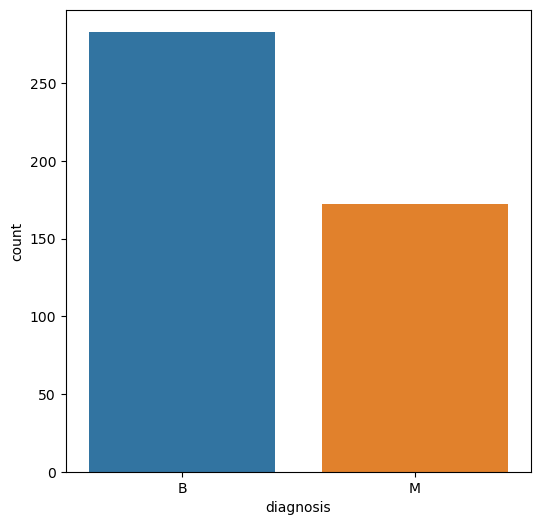

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
               ColumnName  OutlierPercentage
0             radius_mean           2.637363
1        compactness_mean           3.076923
2              texture_se           3.956044
3          symmetry_worst           3.956044
4                 area_se          11.208791
5             symmetry_se           4.395604
6               area_mean           5.274725
7          concavity_mean           3.296703
8                      id          14.505495
9  fractal_dimension_mean           2.637363


Analysis completed. No action taken.                                                    


Skipping customized anti-select columns.                                                


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.                                                 


AutoML will proceed with default encoding technique.                                     


Analysis completed. No categorical columns were found.                                   


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


No information provided for performing customized imbalanced dataset sampling. AutoML will Proceed with default option.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
          ColumnName  OutlierPercentage
0        radius_mean            9.67033
1  compactness_worst            9.67033
2      smoothness_se            9.67033
3        symmetry_se            9.67033
4     compactness_se            9.67033
5       radius_worst            9.67033
6   compactness_mean            9.67033
7      symmetry_mean            9.67033
8    perimeter_worst            9.67033
9       perimeter_se            9.67033


['perimeter_se', 'texture_worst', 'area_se', 'smoothness_se', 'radius_mean', 'texture_se', 'compactness_worst', 'perimeter_mean', 'area_worst', 'symmetry_mean', 'perimeter_worst', 'area_mean', 'concavity_worst', 'radius_worst', 'concavity_mean', 'fractal_dimension_se', 'texture_mean', 'symmetry_worst', 'compactness_mean', 'fractal_dimension_mean', 'concave_points_worst', 'concavity_se', 'concave_points_mean', 'concave_points_se', 'fractal_dimension_worst', 'smoothness_worst', 'radius_se', 'symmetry_se', 'compactness_se', 'smoothness_mean']


['perimeter_se', 'texture_worst', 'area_se', 'smoothness_se', 'radius_mean', 'texture_se', 'compactness_worst', 'perimeter_mean', 'area_worst', 'symmetry_mean', 'perimeter_worst', 'area_mean', 'concavity_worst', 'radius_worst', 'concavity_mean', 'fractal_dimension_se', 'texture_mean', 'symmetry_worst', 'compactness_mean', 'fractal_dimension_mean', 'concave_points_worst', 'concavity_se', 'concave_points_mean', 'concave_points_se', 'fractal_dimension_worst', 'smoothness_worst', 'radius_se', 'symmetry_se', 'compactness_se', 'smoothness_mean']


id,diagnosis,perimeter_se,texture_worst,area_se,smoothness_se,radius_mean,texture_se,compactness_worst,perimeter_mean,area_worst,symmetry_mean,perimeter_worst,area_mean,concavity_worst,radius_worst,concavity_mean,fractal_dimension_se,texture_mean,symmetry_worst,compactness_mean,fractal_dimension_mean,concave_points_worst,concavity_se,concave_points_mean,concave_points_se,fractal_dimension_worst,smoothness_worst,radius_se,symmetry_se,compactness_se,smoothness_mean
10,1,-0.6183191134647444,-0.0909581646423753,-0.3467795642660071,-0.8095238095238094,0.21789858324251582,-0.8339303878643138,-0.5548656253031922,0.1475941611101099,0.013966714058710417,-0.18484848484848468,0.288442813272414,0.00013196093956176967,-0.3352136752136751,0.2592231114581299,-0.5589094449853943,-0.9515570934256056,-0.212398731947869,-0.3491030948156908,-0.46616257088846896,-0.7627118644067797,0.3668618670341026,-0.8964646464646465,-0.19382716049382723,-0.625,-0.7285245901639344,0.11756935270805803,-0.1725543478260868,-0.869402985074627,-0.8527422990232907,-0.19314079422382677
12,1,-0.3658919289987251,-0.3219973009446694,0.0916183046332412,-0.7755102040816325,0.1948201807808196,-0.78214143558445,-0.7646259823420978,0.11335375743377196,-0.17504390733461567,-0.024242424242424093,0.13115122462736867,-0.03153866455529176,-0.6697435897435896,0.0854967792309195,-0.6616358325219084,-0.8823529411764707,-0.3399084184572032,-0.3258426966292133,-0.5947069943289227,-0.9152542372881357,-0.24491904925938682,-0.9015151515151516,-0.33456790123456787,-0.5757575757575758,-0.8727868852459019,-0.4729194187582563,0.3896059782608697,-0.4402985074626867,-0.8091660405709992,-0.36642599277978344
13,0,-0.759929390997352,-0.6329284750337383,-0.8312244315479023,-0.8163265306122447,-0.42060388486441413,-0.7929768696652072,-0.581255457456098,-0.44386375923589827,-0.7438320648992222,-0.408080808080808,-0.5032581829076473,-0.6152019002375297,-0.4741880341880342,-0.5654889713058753,-0.6669912366114898,-0.7439446366782008,-0.774568510038746,-0.5616006307904592,-0.5553875236294897,-0.5211864406779664,-0.37030657940062006,-0.7808080808080808,-0.6876543209876543,-0.5871212121212122,-0.5645901639344263,-0.585204755614267,-0.694633152173913,-0.578358208955224,-0.5792637114951164,-0.48555956678700357
14,0,-0.9391978032754731,0.09851551956815131,-0.9316906098373133,-0.7687074829931971,-0.424450285274697,-0.4656583079032329,-0.8810517124284468,-0.47197693278068115,-0.7288617546207242,-0.314141414141414,-0.5492472473971989,-0.6195566112430722,-0.8042735042735043,-0.5449931680655865,-0.8841285296981499,-0.9584775086505192,-0.3215921098978514,-0.5548984821604573,-0.8412098298676751,-0.7203389830508475,-0.48811574233551497,-0.945959595959596,-0.7814814814814814,-0.7424242424242424,-0.819016393442623,-0.45706737120211377,-0.9466711956521737,-0.7537313432835823,-0.9429000751314801,-0.503610108303249
17,0,-0.5800725703638324,-0.7900134952766533,-0.8297022167253354,-0.4489795918367346,-0.7978075517661386,-0.6770598381318828,-0.385272145144077,-0.7554514326905748,-0.9359371079702266,0.33131313131313156,-0.7818889970788706,-0.8966745843230405,-0.6411965811965812,-0.8436463009955104,-0.5262901655306719,-0.3425605536332181,-0.8605142655864743,-0.41927853341218196,0.5463137996219282,0.8983050847457625,-0.2938339648639339,-0.8242424242424242,-0.3518518518518519,-0.17045454545454547,-0.07934426229508197,0.5719947159841481,-0.2156929347826085,-0.34701492537313444,-0.35236664162283987,1.0
19,0,-0.9127194272825339,-0.5546558704453443,-0.9769765008086766,-0.25850340136054406,-0.5680492339252514,-0.7049223829109725,-0.6588726108469973,-0.5795638853847539,-0.8431880906581918,-0.09696969696969694,-0.676578533443188,-0.7412245975191344,-0.7852991452991454,-0.7060316220964279,-0.8023369036027264,-0.4878892733564015,-0.5611130679816837,-0.5209934949733883,-0.33686200378071846,0.2542372881355929,-0.3448157078883913,-0.9090909090909092,-0.4728395061728395,-0.5113636363636364,-0.18950819672131153,0.2549537648612944,-0.995923913

['perimeter_se', 'area_se', 'texture_worst', 'radius_mean', 'texture_se', 'compactness_worst', 'perimeter_mean', 'symmetry_mean', 'area_worst', 'perimeter_worst', 'area_mean', 'concavity_worst', 'radius_worst', 'concavity_mean', 'fractal_dimension_se', 'texture_mean', 'symmetry_worst', 'compactness_mean', 'concave_points_worst', 'concavity_se', 'concave_points_mean', 'fractal_dimension_worst', 'smoothness_worst', 'radius_se', 'smoothness_mean']


['r_perimeter_se', 'r_area_se', 'r_texture_worst', 'r_radius_mean', 'r_texture_se', 'r_compactness_worst', 'r_perimeter_mean', 'r_symmetry_mean', 'r_area_worst', 'r_perimeter_worst', 'r_area_mean', 'r_concavity_worst', 'r_radius_worst', 'r_concavity_mean', 'r_fractal_dimension_se', 'r_texture_mean', 'r_symmetry_worst', 'r_compactness_mean', 'r_concave_points_worst', 'r_concavity_se', 'r_concave_points_mean', 'r_fractal_dimension_worst', 'r_smoothness_worst', 'r_radius_se', 'r_smoothness_mean']


id,diagnosis,r_perimeter_se,r_area_se,r_texture_worst,r_radius_mean,r_texture_se,r_compactness_worst,r_perimeter_mean,r_symmetry_mean,r_area_worst,r_perimeter_worst,r_area_mean,r_concavity_worst,r_radius_worst,r_concavity_mean,r_fractal_dimension_se,r_texture_mean,r_symmetry_worst,r_compactness_mean,r_concave_points_worst,r_concavity_se,r_concave_points_mean,r_fractal_dimension_worst,r_smoothness_worst,r_radius_se,r_smoothness_mean
10,1,-0.6183191134647444,-0.3467795642660071,-0.0909581646423753,0.21789858324251582,-0.8339303878643138,-0.5548656253031922,0.1475941611101099,-0.18484848484848468,0.013966714058710417,0.288442813272414,0.00013196093956176967,-0.3352136752136751,0.2592231114581299,-0.5589094449853943,-0.9515570934256056,-0.212398731947869,-0.3491030948156908,-0.46616257088846896,0.3668618670341026,-0.8964646464646465,-0.19382716049382723,-0.7285245901639344,0.11756935270805803,-0.1725543478260868,-0.19314079422382677
12,1,-0.3658919289987251,0.0916183046332412,-0.3219973009446694,0.1948201807808196,-0.78214143558445,-0.7646259823420978,0.11335375743377196,-0.024242424242424093,-0.17504390733461567,0.13115122462736867,-0.03153866455529176,-0.6697435897435896,0.0854967792309195,-0.6616358325219084,-0.8823529411764707,-0.3399084184572032,-0.3258426966292133,-0.5947069943289227,-0.24491904925938682,-0.9015151515151516,-0.33456790123456787,-0.8727868852459019,-0.4729194187582563,0.3896059782608697,-0.36642599277978344
13,0,-0.759929390997352,-0.8312244315479023,-0.6329284750337383,-0.42060388486441413,-0.7929768696652072,-0.581255457456098,-0.44386375923589827,-0.408080808080808,-0.7438320648992222,-0.5032581829076473,-0.6152019002375297,-0.4741880341880342,-0.5654889713058753,-0.6669912366114898,-0.7439446366782008,-0.774568510038746,-0.5616006307904592,-0.5553875236294897,-0.37030657940062006,-0.7808080808080808,-0.6876543209876543,-0.5645901639344263,-0.585204755614267,-0.694633152173913,-0.48555956678700357
14,0,-0.9391978032754731,-0.9316906098373133,0.09851551956815131,-0.424450285274697,-0.4656583079032329,-0.8810517124284468,-0.47197693278068115,-0.314141414141414,-0.7288617546207242,-0.5492472473971989,-0.6195566112430722,-0.8042735042735043,-0.5449931680655865,-0.8841285296981499,-0.9584775086505192,-0.3215921098978514,-0.5548984821604573,-0.8412098298676751,-0.48811574233551497,-0.945959595959596,-0.7814814814814814,-0.819016393442623,-0.45706737120211377,-0.9466711956521737,-0.503610108303249
17,0,-0.5800725703638324,-0.8297022167253354,-0.7900134952766533,-0.7978075517661386,-0.6770598381318828,-0.385272145144077,-0.7554514326905748,0.33131313131313156,-0.9359371079702266,-0.7818889970788706,-0.8966745843230405,-0.6411965811965812,-0.8436463009955104,-0.5262901655306719,-0.3425605536332181,-0.8605142655864743,-0.41927853341218196,0.5463137996219282,-0.2938339648639339,-0.8242424242424242,-0.3518518518518519,-0.07934426229508197,0.5719947159841481,-0.2156929347826085,1.0
19,0,-0.9127194272825339,-0.9769765008086766,-0.5546558704453443,-0.5680492339252514,-0.7049223829109725,-0.6588726108469973,-0.5795638853847539,-0.09696969696969694,-0.8431880906581918,-0.676578533443188,-0.7412245975191344,-0.7852991452991454,-0.7060316220964279,-0.8023369036027264,-0.4878892733564015,-0.5611130679816837,-0.5209934949733883,-0.33686200378071846,-0.3448157078883913,-0.9090909090909092,-0.4728395061728395,-0.18950819672131153,0.2549537648612944,-0.9959239130434782,0.20577617328519873
15,1,-0.7411003236245953,-0.5711159737417943,-0.319838056680162,0.23200205141355237,-0.7815222679226925,-0.5863005724265065,0.1728239322400433,-0.23939393939393938,-0.16500794513673994,0.14463336079694408,0.0,-0.42256410256410254,0.09037673238336931,-0.3836416747809153,-0.8961937716262978,-0.5639309616061995,-0.37985412970628796,-0.35954631379962204,0.27936617292456084,-0.8823232323232324,0.030864197530864224,-0.6577049180327869,-0.07001321003963011,-0.5495923913043477,-0.1299638989169675
11,0,-0.9066392076100812,-0.9273142422224336,-0.641025641

['perimeter_se', 'area_se', 'texture_worst', 'smoothness_se', 'radius_mean', 'texture_se', 'compactness_worst', 'perimeter_mean', 'symmetry_mean', 'area_worst', 'perimeter_worst', 'area_mean', 'concavity_worst', 'radius_worst', 'concavity_mean', 'fractal_dimension_se', 'texture_mean', 'symmetry_worst', 'compactness_mean', 'fractal_dimension_mean', 'concave_points_worst', 'concavity_se', 'concave_points_mean', 'concave_points_se', 'fractal_dimension_worst', 'smoothness_worst', 'radius_se', 'symmetry_se', 'compactness_se', 'smoothness_mean']


id,diagnosis,perimeter_se,area_se,texture_worst,smoothness_se,radius_mean,texture_se,compactness_worst,perimeter_mean,symmetry_mean,area_worst,perimeter_worst,area_mean,concavity_worst,radius_worst,concavity_mean,fractal_dimension_se,texture_mean,symmetry_worst,compactness_mean,fractal_dimension_mean,concave_points_worst,concavity_se,concave_points_mean,concave_points_se,fractal_dimension_worst,smoothness_worst,radius_se,symmetry_se,compactness_se,smoothness_mean
202,1,-0.3237226635284888,0.11426125011892309,0.26369770580296886,-0.613896726382704,0.4704788768510803,-0.7177479987616647,-0.30764230481900834,0.410704631465129,-0.1494949494949493,0.2548298068077277,0.577559733353307,0.2768540512008445,-0.016410256410256313,0.4680851063829786,-0.06475170399221035,-0.8237220679076325,0.10672772102853122,-0.3325448452592154,-0.047935883865114055,-0.49322033898305107,0.289700310024113,-0.7985858585858586,0.19308641975308644,-0.5101344951695397,-0.4469369014823561,0.41359043782605837,0.5604619565217392,-0.7585576169323229,-0.6659656923123142,-0.10860341247630238
181,1,-0.5273119544964204,-0.10018076301017982,0.23994601889338735,-0.5651494034061938,0.2281556510032695,-0.4178939454247932,-0.25311678357636974,0.1620111731843577,-0.5888888888888888,-0.11315547378104872,0.1730956482660476,0.0007917656373712181,-0.13914529914529902,0.14210423579933626,-0.4138266796494645,-0.8034769149979963,0.023599859105318834,-0.6313818253498914,-0.3080296385906548,-0.8377118644067798,0.19807096107475025,-0.7504040404040404,-0.29185185185185186,-0.3400265201742753,-0.6799160435524073,-0.04338638314732857,0.1321331521739132,-0.6992048975325694,-0.3867275512963019,-0.44605940236526154
255,0,-0.7797391389624398,-0.6936542669584245,-0.6458839406207828,-0.6765815684808105,-0.23725879864093832,-0.8680288355225333,-0.8024468570208886,-0.28888087943773655,-0.3363636363636363,-0.6154553817847286,-0.40648640551269577,-0.4656901557139088,-0.737948717948718,-0.3976185828616045,-0.7709347614410905,-0.937868800353772,-0.6681930257132794,-0.6195545042381233,-0.6452442159383034,-0.7305084745762714,-0.36465725111953157,-0.9085858585858586,-0.5393827160493827,-0.5821178253457094,-0.8680309589400499,-0.2520636597767944,-0.4989809782608695,-0.5857254843405876,-0.8463664493646169,-0.24889410490204944
429,1,-0.28998725115229956,0.7659594710303492,-0.004588394062078319,-0.5675289798415883,0.4268863388678763,-0.3064437663084339,-0.3809898031454047,0.36565146873310517,-0.10808080808080794,0.1536338546458142,0.3603475395101492,0.2399049881235154,-0.33128205128205124,0.36463009955104436,-0.22395326192794554,-0.7498583530257176,-0.2194434660091583,-0.431500098561009,-0.09632541962800546,-0.5305084745762714,0.17671374440234244,-0.7312626262626263,0.07950617283950619,-0.30517143398370905,-0.6313787222878131,-0.10414052697616027,-0.514266304347826,-0.40468102579416926,-0.41977348514435064,-0.112214498510427
210,1,-0.31430812984211043,0.46817619636571206,0.1811066126855599,-0.60329061427066,0.420475671517405,-0.48379107514041836,-0.1163178779676146,0.3512344566588576,-0.09797979797979783,0.3794430040980179,0.5970339300426933,0.21615201900237524,-0.20786324786324786,0.5481163380831543,-0.4839337877312561,-0.7546950789768252,-0.25748502994011985,-0.16656810565740177,-0.0864962951761682,-0.551271186440678,0.41095418532552536,-0.8023232323232323,-0.24814814814814815,-0.31199090736881985,-0.427259609077791,0.0384996367958793,0.5811820652173915,-0.48493784762402475,-0.4484633640760658,-0.3043242755258644
26,1,-0.759929390997352,-0.6418989629911521,0.03643724696356279,-0.7986198456674712,-0.05006731200717987,-0.791650081818584,-0.6538114503594611,-0.11083078032077837,-0.4383838383838383,-0.3255833403027515,-0.05310463635682723,-0.2842438638163105,-0.5364102564102564,-0.08042162795237147,-0.744255111976631,-0.9492696543813828,-0.21592109897851364,-0.562389118864577,-0.6111447149553909,-0.7203389830508475,0.05408198415432308,-0.9190404040404041,-0.5883950617283951,-0.6506156469028226,-0.689229961

['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


                                                                                          
Skipping customized hyperparameter tuning


response_column : diagnosis                                                                                                                           
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : diagnosis
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
-------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,rfe,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,XGBOOST_3,lasso,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,3,XGBOOST_0,lasso,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,4,SVM_2,pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,5,GLM_2,pca,0.987952,0.987952,0.987952,0.987952,0.983871,0.990566,0.987041,0.988340,0.987952,0.987993
5,6,KNN_9,lasso,0.987952,0.987952,0.987952,0.987952,0.990741,0.983333,0.986853,0.988175,0.987952,0.987906
6,7,KNN_4,rfe,0.987952,0.987952,0.987952,0.987952,0.990741,0.983333,0.986853,0.988175,0.987952,0.987906
7,8,DECISIONFOREST_2,pca,0.975904,0.975904,0.975904,0.975904,0.973899,0.973899,0.973899,0.975904,0.975904,0.975904
8,9,SVM_3,lasso,0.975904,0.975904,0.975904,0.975904,0.981818,0.966667,0.973499,0.976780,0.975904,0.975711
9,10,GLM_3,lasso,0.975904,0.975904,0.975904,0.975904,0.981818,0.966667,0.973499,0.976780,0.975904,0.975711


In [17]:
# Fitting train data
aml.fit(cancer_df_train, cancer_df_train.diagnosis)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,rfe,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,XGBOOST_3,lasso,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,3,XGBOOST_0,lasso,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,4,SVM_2,pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,5,GLM_2,pca,0.987952,0.987952,0.987952,0.987952,0.983871,0.990566,0.987041,0.988340,0.987952,0.987993
5,6,KNN_9,lasso,0.987952,0.987952,0.987952,0.987952,0.990741,0.983333,0.986853,0.988175,0.987952,0.987906
6,7,KNN_4,rfe,0.987952,0.987952,0.987952,0.987952,0.990741,0.983333,0.986853,0.988175,0.987952,0.987906
7,8,DECISIONFOREST_2,pca,0.975904,0.975904,0.975904,0.975904,0.973899,0.973899,0.973899,0.975904,0.975904,0.975904
8,9,SVM_3,lasso,0.975904,0.975904,0.975904,0.975904,0.981818,0.966667,0.973499,0.976780,0.975904,0.975711
9,10,GLM_3,lasso,0.975904,0.975904,0.975904,0.975904,0.981818,0.966667,0.973499,0.976780,0.975904,0.975711


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,rfe,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [20]:
aml.model_hyperparameters(rank=2)

{'response_column': 'diagnosis',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 20,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

In [21]:
aml.model_hyperparameters(rank=5)

{'response_column': 'diagnosis',
 'name': 'glm',
 'family': 'BINOMIAL',
 'lambda1': 0.001,
 'alpha': 0.15,
 'learning_rate': 'OPTIMAL',
 'initial_eta': 0.05,
 'momentum': 0.65,
 'iter_num_no_change': 5,
 'iter_max': 300,
 'batch_size': 10,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [22]:
# Generating prediction on test data
prediction = aml.predict(cancer_df_test, 2)

Data Transformation started ...


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
B,11.89,21.17,76.39,433.8,0.09773,0.0812,0.02555,0.02179,0.2019,0.0629,0.2747,1.203,1.93,19.53,0.009895,0.03053,0.0163,0.009276,0.02258,0.002272,13.05,27.21,85.09,522.9,0.1426,0.2187,0.1164,0.08263,0.3075,0.07351
B,14.95,18.77,97.84,689.5,0.08138,0.1167,0.0905,0.03562,0.1744,0.06493,0.422,1.909,3.271,39.43,0.00579,0.04877,0.05303,0.01527,0.03356,0.009368,16.25,25.47,107.1,809.7,0.0997,0.2521,0.25,0.08405,0.2852,0.09218
M,18.08,21.84,117.4,1024.0,0.07371,0.08642,0.1103,0.05778,0.177,0.0534,0.6362,1.305,4.312,76.36,0.00553,0.05296,0.0611,0.01444,0.0214,0.005036,19.76,24.7,129.1,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558
M,16.26,21.88,107.5,826.8,0.1165,0.1283,0.1799,0.07981,0.1869,0.06532,0.5706,1.457,2.961,57.72,0.01056,0.03756,0.05839,0.01186,0.04022,0.006187,17.73,25.21,113.7,975.2,0.1426,0.2116,0.3344,0.1047,0.2736,0.07953
M,19.07,24.81,128.3,1104.0,0.09081,0.219,0.2107,0.09961,0.231,0.06343,0.9811,1.666,8.83,104.9,0.006548,0.1006,0.09723,0.02638,0.05333,0.007646,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.467,0.1038
B,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,0.07187,0.1559,0.5796,1.046,8.322,0.01011,0.01055,0.01981,0.005742,0.0209,0.002788,9.507,15.4,59.9,274.9,0.1733,0.1239,0.1168,0.04419,0.322,0.09026
M,15.5,21.08,102.9,803.1,0.112,0.1571,0.1522,0.08481,0.2085,0.06864,1.37,1.213,9.424,176.5,0.008198,0.03889,0.04493,0.02139,0.02018,0.005815,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.1048
B,14.64,15.24,95.77,651.9,0.1132,0.1339,0.09966,0.07064,0.2116,0.06346,0.5115,0.7372,3.814,42.76,0.005508,0.04412,0.04436,0.01623,0.02427,0.004841,16.34,18.24,109.4,803.6,0.1277,0.3089,0.2604,0.1397,0.3151,0.08473
B,14.03,21.25,89.79,603.4,0.0907,0.06945,0.01462,0.01896,0.1517,0.05835,0.2589,1.503,1.667,22.07,0.007389,0.01383,0.007302,0.01004,0.01263,0.002925,15.33,30.28,98.27,715.5,0.1287,0.1513,0.06231,0.07963,0.2226,0.07617
B,14.47,24.99,95.81,656.4,0.08837,0.123,0.1009,0.0389,0.1872,0.06341,0.2542,1.079,2.615,23.11,0.007138,0.04653,0.03829,0.01162,0.02068,0.006111,16.22,31.73,113.5,808.9,0.134,0.4202,0.404,0.1205,0.3187,0.1023


perimeter_se,texture_worst,area_se,smoothness_se,radius_mean,texture_se,compactness_worst,id,perimeter_mean,area_worst,symmetry_mean,perimeter_worst,area_mean,concavity_worst,radius_worst,concavity_mean,fractal_dimension_se,texture_mean,symmetry_worst,compactness_mean,fractal_dimension_mean,concave_points_worst,concavity_se,concave_points_mean,concave_points_se,fractal_dimension_worst,smoothness_worst,radius_se,symmetry_se,compactness_se,smoothness_mean,diagnosis
1.628,19.68,20.86,0.01215,11.54,1.768,0.2118,59,74.65,457.8,0.1818,78.78,402.9,0.1797,12.26,0.06737,0.005512,14.44,0.2329,0.112,0.06782,0.06918,0.05553,0.02594,0.01494,0.08134,0.1345,0.2784,0.0184,0.04112,0.09984,0
1.204,20.45,15.5,0.003632,13.2,0.5735,0.1346,57,84.07,636.9,0.1632,92.0,537.3,0.0112,14.41,0.001461,0.002585,15.82,0.2651,0.05251,0.05894,0.025,0.001128,0.003261,0.002386,0.08385,0.1128,0.1903,0.01344,0.007861,0.08511,0
1.52,21.33,17.47,0.00721,11.94,0.6329,0.08906,103,75.71,527.2,0.1868,83.67,437.6,0.09203,13.1,0.01972,0.002635,18.24,0.2785,0.04751,0.0611,0.06296,0.01311,0.01349,0.008,0.07408,0.1144,0.2273,0.01996,0.00838,0.08261,0
4.895,24.9,90.47,0.008102,18.66,1.581,0.2291,40,121.4,1549.0,0.1966,145.4,1077.0,0.3272,22.25,0.1457,0.00457,17.12,0.2894,0.11,0.06213,0.1674,0.03342,0.08665,0.01601,0.08456,0.1503,0.7128,0.02045,0.02101,0.1054,1
2.759,31.24,25.17,0.01474,9.405,2.878,0.1193,107,59.6,359.4,0.2025,68.73,271.2,0.06141,10.85,0.02047,0.00459,21.7,0.2872,0.06159,0.06601,0.0377,0.01367,0.01257,0.008674,0.08304,0.1526,0.4302,0.03044,0.01674,0.1044,0
3.479,28.07,46.61,0.003443,16.84,2.06,0.171,77,108.4,1032.0,0.1844,120.3,880.2,0.1882,18.22,0.0515,0.001519,19.46,0.2527,0.07223,0.05268,0.08436,0.03056,0.02771,0.0111,0.05972,0.08774,0.4789,0.0152,0.02661,0.07445,0
2.735,30.7,40.09,0.003659,14.71,1.15,0.429,119,95.55,985.5,0.2027,115.7,656.9,0.3587,17.87,0.1293,0.004108,21.59,0.3698,0.1365,0.06758,0.1834,0.02572,0.08123,0.01272,0.1094,0.1368,0.4226,0.01817,0.02855,0.1137,1
2.302,23.31,23.13,0.007595,10.49,1.534,0.1486,73,67.41,402.8,0.2217,74.22,336.1,0.07987,11.54,0.02995,0.003451,19.29,0.2826,0.08578,0.06481,0.03203,0.0288,0.01201,0.008614,0.07552,0.1219,0.355,0.0271,0.02219,0.09989,0
2.903,28.65,53.16,0.005654,19.4,0.9951,0.3749,100,127.2,1628.0,0.1893,152.4,1145.0,0.4316,23.79,0.1626,0.001965,18.18,0.359,0.1442,0.05892,0.2252,0.03059,0.09464,0.01499,0.07787,0.1518,0.4709,0.01623,0.02199,0.1037,1
3.814,18.24,42.76,0.005508,14.64,0.7372,0.3089,23,95.77,803.6,0.2116,109.4,651.9,0.2604,16.34,0.09966,0.004841,15.24,0.3151,0.1339,0.06346,0.1397,0.04436,0.07064,0.01623,0.08473,0.1277,0.5115,0.02427,0.04412,0.1132,0


id,perimeter_se,texture_worst,area_se,smoothness_se,radius_mean,texture_se,compactness_worst,perimeter_mean,area_worst,symmetry_mean,perimeter_worst,area_mean,concavity_worst,radius_worst,concavity_mean,fractal_dimension_se,texture_mean,symmetry_worst,compactness_mean,fractal_dimension_mean,concave_points_worst,concavity_se,concave_points_mean,concave_points_se,fractal_dimension_worst,smoothness_worst,radius_se,symmetry_se,compactness_se,smoothness_mean,diagnosis
19,1.491,23.03,18.19,0.0086,11.34,1.01,0.1574,72.76,478.6,0.1927,79.15,391.2,0.1624,12.47,0.043,0.0012,18.61,0.306,0.085,0.0621,0.0854,0.021,0.0259,0.0111,0.0678,0.1483,0.243,0.0243,0.0164,0.1049,0
99,1.199,28.46,13.24,0.0079,12.3,1.532,0.0905,77.88,544.3,0.1539,84.53,464.4,0.0362,13.35,0.0078,0.0022,19.02,0.2554,0.042,0.0595,0.0398,0.007,0.0085,0.0065,0.0721,0.1222,0.184,0.0194,0.0084,0.0831,0
95,1.973,17.81,15.24,0.0068,12.19,0.8163,0.2585,79.08,545.2,0.188,91.38,455.8,0.0992,13.34,0.0285,0.0041,13.29,0.3469,0.0951,0.0647,0.0819,0.0102,0.0288,0.0081,0.0924,0.1427,0.2005,0.0266,0.0246,0.1066,0
78,2.155,29.26,20.62,0.0085,11.64,1.657,0.266,75.17,521.7,0.1801,85.51,412.5,0.2873,13.14,0.0707,0.0038,18.33,0.2806,0.1017,0.0652,0.1218,0.0295,0.0348,0.014,0.091,0.1688,0.306,0.0157,0.0231,0.1142,0
80,2.41,20.92,24.44,0.0054,12.18,1.511,0.0936,77.79,495.2,0.19,82.14,451.1,0.0498,12.83,0.0249,0.0034,17.84,0.2227,0.0706,0.0664,0.0588,0.0113,0.0294,0.0152,0.0738,0.114,0.3661,0.0222,0.0118,0.1045,0
38,1.737,25.58,20.74,0.0056,13.87,1.363,0.1008,88.52,694.4,0.1424,96.74,593.7,0.0529,15.11,0.015,0.0021,16.21,0.2362,0.0549,0.0588,0.0556,0.0053,0.0209,0.006,0.0711,0.1153,0.2543,0.0154,0.0079,0.0874,0
40,4.895,24.9,90.47,0.0081,18.66,1.581,0.2291,121.4,1549.0,0.1966,145.4,1077.0,0.3272,22.25,0.1457,0.0046,17.12,0.2894,0.11,0.0621,0.1674,0.0334,0.0867,0.016,0.0846,0.1503,0.7128,0.0204,0.021,0.1054,1
57,1.204,20.45,15.5,0.0036,13.2,0.5735,0.1346,84.07,636.9,0.1632,92.0,537.3,0.0112,14.41,0.0015,0.0026,15.82,0.2651,0.0525,0.0589,0.025,0.0011,0.0033,0.0024,0.0838,0.1128,0.1903,0.0134,0.0079,0.0851,0
61,2.363,24.3,36.74,0.0076,18.81,0.828,0.116,120.9,1236.0,0.155,129.0,1102.0,0.221,19.96,0.0802,0.0017,19.98,0.2567,0.0588,0.05,0.1294,0.0262,0.0584,0.0146,0.0574,0.1243,0.3283,0.0193,0.0111,0.0892,1
36,1.696,22.15,18.4,0.0057,12.65,0.6332,0.3842,82.69,633.7,0.1641,95.29,485.6,0.3582,14.38,0.0802,0.0036,18.17,0.323,0.1334,0.0685,0.1407,0.0264,0.0507,0.0103,0.1033,0.1533,0.2324,0.0176,0.025,0.1076,0


id,diagnosis,perimeter_se,texture_worst,area_se,smoothness_se,radius_mean,texture_se,compactness_worst,perimeter_mean,area_worst,symmetry_mean,perimeter_worst,area_mean,concavity_worst,radius_worst,concavity_mean,fractal_dimension_se,texture_mean,symmetry_worst,compactness_mean,fractal_dimension_mean,concave_points_worst,concavity_se,concave_points_mean,concave_points_se,fractal_dimension_worst,smoothness_worst,radius_se,symmetry_se,compactness_se,smoothness_mean
76,0,-0.7150142198685887,-0.13792172739541161,-0.7149652744743602,-0.585034013605442,-0.2988012052054617,-0.5090000442262615,-0.7335791209857381,-0.348711479545864,-0.644810571213515,-0.3404040404040402,-0.3888098269792525,-0.5139878595935603,-0.8683760683760684,-0.4317782549287526,-0.9123661148977605,-0.8754325259515573,-0.32018316308559364,-0.5576581904198697,-0.7482041587901703,-0.63135593220339,-0.7106441612125387,-0.9323232323232323,-0.8444444444444444,-0.7878787878787878,-0.7468852459016394,-0.4636723910171732,-0.5006793478260869,-0.5149253731343285,-0.7265214124718256,-0.6263537906137184
78,0,-0.7485534961263116,-0.0947368421052631,-0.8186661592617259,-0.5374149659863944,-0.4936854926597857,-0.4276237229666976,-0.5368196371398081,-0.5089205262209406,-0.7506899724011038,-0.2515151515151513,-0.5353157066886376,-0.6805225653206651,-0.5088888888888888,-0.5645129806753854,-0.6557935735150925,-0.7993079584775088,-0.4758717858400847,-0.5107431500098559,-0.3776937618147449,-0.3644067796610174,-0.16086806751636235,-0.851010101010101,-0.5703703703703704,-0.46969696969696967,-0.5278688524590165,0.28929986789960377,-0.5608016304347825,-0.7089552238805972,-0.6874530428249437,0.11191335740072199
97,0,-0.8015102481121897,-0.45155195681511484,-0.8747978308438779,-0.4693877551020407,-0.828450541701391,-0.6323913139622308,-0.2059765208110994,-0.8041088484411605,-0.9154470184828969,0.06161616161616184,-0.8350685341921955,-0.8942992874109265,1.1401709401709403,-0.8407183291040404,0.5238558909444986,-0.3979238754325261,-0.5463191264529765,0.049871870687956045,-0.07826086956521738,0.2838983050847457,0.20564932828108845,0.5343434343434343,-0.4604938271604938,0.25757575757575757,-0.1803278688524592,0.017173051519154502,-0.48811141304347805,0.2723880597014926,0.25920360631104433,-0.02527075812274366
19,0,-0.8787878787878786,-0.4310391363022942,-0.8649034344971934,-0.5306122448979591,-0.5321494967626129,-0.7137676352217946,-0.7475502085961,-0.5523517750946114,-0.7867358032951408,-0.12424242424242402,-0.6305894689536364,-0.7086302454473477,-0.7223931623931624,-0.6299043529182119,-0.7906523855890945,-0.9792387543252596,-0.4561465304684749,-0.41060516459688534,-0.5039697542533083,-0.4957627118644069,-0.4116431277988288,-0.893939393939394,-0.6802469135802469,-0.5795454545454545,-0.8321311475409837,0.018494055482166247,-0.7747961956521738,-0.3880597014925375,-0.7881292261457551,-0.05595667870036112
80,0,-0.6985387859174266,-0.5449392712550607,-0.7459804014841594,-0.748299319727891,-0.424450285274697,-0.49219406483569944,-0.8713495682545844,-0.4617048116777796,-0.7728527222547461,-0.15151515151515135,-0.5857988165680474,-0.6295856426497758,-0.9148717948717949,-0.5947686902205738,-0.8787731256085686,-0.8269896193771628,-0.5103909827404016,-0.7390104474669819,-0.6128544423440455,-0.31355932203389847,-0.5949018256975543,-0.942929292929293,-0.6370370370370371,-0.42424242424242425,-0.7534426229508197,-0.43461030383091154,-0.3566576086956521,-0.46641791044776126,-0.8572501878287002,-0.06317689530685927
38,0,-0.8305383936451897,-0.29338731443994615,-0.8163828370278756,-0.7346938775510202,-0.20776972882877104,-0.5576489319357835,-0.8573784806442226,-0.2683366372319337,-0.6062557497700092,-0.6323232323232322,-0.3670886075949369,-0.441409342834521,-0.9095726495726496,-0.37224282646886586,-0.9269717624148005,-0.9169550173010382,-0.6252201479394153,-0.6857875024640251,-0.7315689981096409,-0.6355932203389834,-0.6169479848432656,-0.9732323232323232,-0.7419753086419753,-0.7727272727272728,-0.788852459016393

id,perimeter_se,area_se,texture_worst,radius_mean,texture_se,compactness_worst,perimeter_mean,symmetry_mean,area_worst,perimeter_worst,area_mean,concavity_worst,radius_worst,concavity_mean,fractal_dimension_se,texture_mean,symmetry_worst,compactness_mean,concave_points_worst,concavity_se,concave_points_mean,fractal_dimension_worst,smoothness_worst,radius_se,smoothness_mean,diagnosis
78,2.155,20.62,29.26,11.64,1.657,0.266,75.17,0.1801,521.7,85.51,412.5,0.2873,13.14,0.0707,0.0038,18.33,0.2806,0.1017,0.1218,0.0295,0.0348,0.091,0.1688,0.306,0.1142,0
99,1.199,13.24,28.46,12.3,1.532,0.0905,77.88,0.1539,544.3,84.53,464.4,0.0362,13.35,0.0078,0.0022,19.02,0.2554,0.042,0.0398,0.007,0.0085,0.0721,0.1222,0.184,0.0831,0
95,1.973,15.24,17.81,12.19,0.8163,0.2585,79.08,0.188,545.2,91.38,455.8,0.0992,13.34,0.0285,0.0041,13.29,0.3469,0.0951,0.0819,0.0102,0.0288,0.0924,0.1427,0.2005,0.1066,0
101,7.158,106.4,36.27,19.55,1.199,0.5329,133.6,0.1893,1926.0,178.6,1207.0,0.4251,25.05,0.1784,0.0053,28.77,0.2818,0.2063,0.1941,0.0386,0.1144,0.1005,0.1281,0.8426,0.0926,1
61,2.363,36.74,24.3,18.81,0.828,0.116,120.9,0.155,1236.0,129.0,1102.0,0.221,19.96,0.0802,0.0017,19.98,0.2567,0.0588,0.1294,0.0262,0.0584,0.0574,0.1243,0.3283,0.0892,1
36,1.696,18.4,22.15,12.65,0.6332,0.3842,82.69,0.1641,633.7,95.29,485.6,0.3582,14.38,0.0802,0.0036,18.17,0.323,0.1334,0.1407,0.0264,0.0507,0.1033,0.1533,0.2324,0.1076,0
80,2.41,24.44,20.92,12.18,1.511,0.0936,77.79,0.19,495.2,82.14,451.1,0.0498,12.83,0.0249,0.0034,17.84,0.2227,0.0706,0.0588,0.0113,0.0294,0.0738,0.114,0.3661,0.1045,0
38,1.737,20.74,25.58,13.87,1.363,0.1008,88.52,0.1424,694.4,96.74,593.7,0.0529,15.11,0.015,0.0021,16.21,0.2362,0.0549,0.0556,0.0053,0.0209,0.0711,0.1153,0.2543,0.0874,0
40,4.895,90.47,24.9,18.66,1.581,0.2291,121.4,0.1966,1549.0,145.4,1077.0,0.3272,22.25,0.1457,0.0046,17.12,0.2894,0.11,0.1674,0.0334,0.0867,0.0846,0.1503,0.7128,0.1054,1
57,1.204,15.5,20.45,13.2,0.5735,0.1346,84.07,0.1632,636.9,92.0,537.3,0.0112,14.41,0.0015,0.0026,15.82,0.2651,0.0525,0.025,0.0011,0.0033,0.0838,0.1128,0.1903,0.0851,0


id,diagnosis,r_perimeter_se,r_area_se,r_texture_worst,r_radius_mean,r_texture_se,r_compactness_worst,r_perimeter_mean,r_symmetry_mean,r_area_worst,r_perimeter_worst,r_area_mean,r_concavity_worst,r_radius_worst,r_concavity_mean,r_fractal_dimension_se,r_texture_mean,r_symmetry_worst,r_compactness_mean,r_concave_points_worst,r_concavity_se,r_concave_points_mean,r_fractal_dimension_worst,r_smoothness_worst,r_radius_se,r_smoothness_mean
61,1,-0.7077571834853387,-0.5119398725145087,-0.36248313090418355,0.4256042053977819,-0.7942594312502764,-0.8278839623556808,0.31519192647323857,-0.5050505050505049,-0.1532993225725516,0.11617107332784055,0.22934811295856422,-0.6222222222222222,0.10111262931875867,-0.6095423563777994,-0.9446366782006921,-0.359633673828813,-0.6049674748669426,-0.7020793950850664,-0.10850843954529807,-0.8676767676767677,-0.27901234567901234,-0.9685245901639344,-0.2985468956406871,-0.4850543478260869,-0.33935018050541516
80,0,-0.6985387859174266,-0.7459804014841594,-0.5449392712550607,-0.424450285274697,-0.49219406483569944,-0.8713495682545844,-0.4617048116777796,-0.15151515151515135,-0.7728527222547461,-0.5857988165680474,-0.6295856426497758,-0.9148717948717949,-0.5947686902205738,-0.8787731256085686,-0.8269896193771628,-0.5103909827404016,-0.7390104474669819,-0.6128544423440455,-0.5949018256975543,-0.942929292929293,-0.6370370370370371,-0.7534426229508197,-0.43461030383091154,-0.3566576086956521,-0.06317689530685927
38,0,-0.8305383936451897,-0.8163828370278756,-0.29338731443994615,-0.20776972882877104,-0.5576489319357835,-0.8573784806442226,-0.2683366372319337,-0.6323232323232322,-0.6062557497700092,-0.3670886075949369,-0.441409342834521,-0.9095726495726496,-0.37224282646886586,-0.9269717624148005,-0.9169550173010382,-0.6252201479394153,-0.6857875024640251,-0.7315689981096409,-0.6169479848432656,-0.9732323232323232,-0.7419753086419753,-0.7888524590163936,-0.41743725231175705,-0.7364130434782606,-0.371841155234657
40,1,-0.21114053152888107,0.5104176576919417,-0.33009446693657235,0.4063722033463685,-0.46123568174782187,-0.6084214611429128,0.32420255901964334,-0.08484848484848476,0.10847202475537346,0.36184555464010193,0.1963578780680918,-0.44068376068376064,0.3246144837009565,-0.29065238558909445,-0.7439446366782008,-0.5611130679816837,-0.4760496747486693,-0.31493383742911163,0.15328970031002406,-0.8313131313131314,0.07037037037037033,-0.6118032786885248,0.044914134742404056,0.820991847826087,-0.046931407942238365
78,0,-0.7485534961263116,-0.8186661592617259,-0.0947368421052631,-0.4936854926597857,-0.4276237229666976,-0.5368196371398081,-0.5089205262209406,-0.2515151515151513,-0.7506899724011038,-0.5353157066886376,-0.6805225653206651,-0.5088888888888888,-0.5645129806753854,-0.6557935735150925,-0.7993079584775088,-0.4758717858400847,-0.5107431500098559,-0.3776937618147449,-0.16086806751636235,-0.851010101010101,-0.5703703703703704,-0.5278688524590165,0.28929986789960377,-0.5608016304347825,0.11191335740072199
97,0,-0.8015102481121897,-0.8747978308438779,-0.45155195681511484,-0.828450541701391,-0.6323913139622308,-0.2059765208110994,-0.8041088484411605,0.06161616161616184,-0.9154470184828969,-0.8350685341921955,-0.8942992874109265,1.1401709401709403,-0.8407183291040404,0.5238558909444986,-0.3979238754325261,-0.5463191264529765,0.049871870687956045,-0.07826086956521738,0.20564932828108845,0.5343434343434343,-0.4604938271604938,-0.1803278688524592,0.017173051519154502,-0.48811141304347805,-0.02527075812274366
76,0,-0.7150142198685887,-0.7149652744743602,-0.13792172739541161,-0.2988012052054617,-0.5090000442262615,-0.7335791209857381,-0.348711479545864,-0.3404040404040402,-0.644810571213515,-0.3888098269792525,-0.5139878595935603,-0.8683760683760684,-0.4317782549287526,-0.9123661148977605,-0.8754325259515573,-0.32018316308559364,-0.5576581904198697,-0.7482041587901703,-0.7106441612125387,-0.9323232323232323,-0.8444444444444444,-0.7468852459016394,-0.4636723910171732,-0.5006793478260869,-0.6263537906137184
93,0,-0.510444248

id,diagnosis,perimeter_se,area_se,texture_worst,smoothness_se,radius_mean,texture_se,compactness_worst,perimeter_mean,symmetry_mean,area_worst,perimeter_worst,area_mean,concavity_worst,radius_worst,concavity_mean,fractal_dimension_se,texture_mean,symmetry_worst,compactness_mean,fractal_dimension_mean,concave_points_worst,concavity_se,concave_points_mean,concave_points_se,fractal_dimension_worst,smoothness_worst,radius_se,symmetry_se,compactness_se,smoothness_mean
78,0,-0.7485534961263116,-0.8186661592617259,-0.0947368421052631,-0.5385661352279295,-0.4936854926597857,-0.4276237229666976,-0.5368047268387811,-0.5089205262209406,-0.2515151515151513,-0.7506899724011038,-0.5353157066886376,-0.6805225653206651,-0.5088888888888888,-0.5645129806753854,-0.6557935735150925,-0.7992620538120311,-0.4758717858400847,-0.5107431500098559,-0.377589596249811,-0.3661016949152546,-0.16086806751636235,-0.851010101010101,-0.5703703703703704,-0.4695965144913809,-0.5282697100878919,0.2894406656540978,-0.5608016304347825,-0.7081637985740417,-0.6868447141526723,0.11167283560530825
80,0,-0.6985387859174266,-0.7459804014841594,-0.5449392712550607,-0.749328619505728,-0.424450285274697,-0.49219406483569944,-0.8713314123274248,-0.4617048116777796,-0.15151515151515135,-0.7728527222547461,-0.5857988165680474,-0.6295856426497758,-0.9148717948717949,-0.5947686902205738,-0.8787731256085686,-0.8269004878183602,-0.5103909827404016,-0.7390104474669819,-0.6127324965976109,-0.3152542372881357,-0.5949018256975543,-0.942929292929293,-0.6370370370370371,-0.4241333585906421,-0.7539026629935721,-0.43432609126328975,-0.3566576086956521,-0.4655268953675016,-0.8565806470994684,-0.0634648370497428
38,0,-0.8305383936451897,-0.8163828370278756,-0.29338731443994615,-0.7357310398749023,-0.20776972882877104,-0.5576489319357835,-0.8573604602652541,-0.2683366372319337,-0.6323232323232322,-0.6062557497700092,-0.3670886075949369,-0.441409342834521,-0.9095726495726496,-0.37224282646886586,-0.9269717624148005,-0.9167253983389302,-0.6252201479394153,-0.6857875024640251,-0.7314380765159534,-0.6372881355932205,-0.6169479848432656,-0.9732323232323232,-0.7419753086419753,-0.772684220496306,-0.7893217893217894,-0.41715644192035906,-0.7364130434782606,-0.7193624248758819,-0.9151620752846457,-0.37221269296740994
99,0,-0.9360596253800136,-0.9590904766435163,-0.13792172739541161,-0.5793588741204067,-0.409064683633566,-0.4829065499093361,-0.8773466833541927,-0.4600828978194269,-0.5161616161616159,-0.7317889102617713,-0.5499962549621752,-0.6120348376880445,-0.9381196581196581,-0.5440171774350966,-0.9620253164556962,-0.9098157898373479,-0.42726312081718926,-0.6100926473487086,-0.8289732345380312,-0.607627118644068,-0.7258008956252153,-0.9646464646464646,-0.8950617283950618,-0.7537412388709983,-0.7762035943854126,-0.3260252261771113,-0.9752038043478259,-0.5700474075180111,-0.9076516357737255,-0.44985104270109255
101,1,0.23271550456016485,0.8135286842355628,0.28367071524966275,-0.6813407213515995,0.5204820821847557,-0.6301800008845252,-0.018909295534146373,0.5440619931519192,-0.1585858585858585,0.42376850380530234,0.8591865777844355,0.3679070994985484,-0.2733333333333333,0.5978918602381418,-0.13145082765335928,-0.6956179262882967,0.2595984501585064,-0.5060122215651487,0.4132768788749434,-0.4889830508474577,0.337237340682053,-0.8050505050505051,0.41234567901234565,-0.4241333585906421,-0.40364685819231266,-0.24810143300534895,1.261888586956522,-0.5700474075180111,-0.3188331781175834,-0.27832445608016615
17,1,-0.46552907717956254,-0.09542384168965846,-0.027800269905533095,-0.5249685555971039,0.037117763959228195,-0.6863473530582459,-0.09730185988299338,0.0412686970625339,0.046464646464646674,-0.12319143597892444,0.1356452700172273,-0.1921351280021114,0.25743589743589756,0.1235604138200275,0.038461538461538415,-0.6472506667772204,-0.15322296583303985,-0.3262369406662722,0.1781339785271435,-0.02288135593220334,0.40130899069927656,-0.6994949494949495,0.17037037037037028,-0.4733851108164425,-0.079627443263806

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,diagnosis
0,76,-0.865660,-0.522888,0.164452,0.313496,0.050464,0.139052,-0.140675,0.128789,0.107192,-0.091152,0
1,101,3.315126,-0.496905,0.996615,0.367122,-0.167156,-0.327820,-0.511255,0.454907,-0.133250,-0.200992,1
2,40,2.035522,-0.588574,0.824578,-0.456514,-0.424396,-0.259652,-0.017302,0.058018,-0.027243,0.035357,1
3,19,-0.997271,0.274522,-0.119414,-0.093208,-0.264181,0.165246,0.283078,-0.167945,0.068957,0.139909,0
4,80,-0.957956,-0.071352,0.382755,-0.234224,-0.093711,-0.047399,0.128599,-0.072759,-0.289141,-0.184358,0
5,99,-1.357641,-0.427039,-0.202851,0.309436,0.050219,0.083548,0.223409,0.015564,0.170265,-0.083271,0
6,61,0.655577,-1.162132,-0.314133,-0.162816,0.220229,0.093086,0.224280,-0.416097,0.330896,-0.046663,1
7,78,-0.495881,0.614489,-0.147928,0.196003,-0.317687,-0.328290,0.296715,-0.079656,-0.031580,0.175711,0
8,93,0.192168,0.660164,-0.449214,0.191358,0.729295,-0.246556,-0.653449,0.442772,0.120216,0.239913,0
9,17,1.949529,0.946691,-0.049441,0.118359,-0.392989,-0.472949,-0.156459,0.125328,-0.018405,0.040797,1


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being picked for evaluation:
Model ID : XGBOOST_3 
Feature Selection Method : lasso

Target Column Mapping:
M: 1
B: 0

Prediction : 
    id  Prediction  diagnosis    prob_0    prob_1
0   61           1          1  0.001934  0.998066
1  101           1          1  0.001865  0.998135
2   17           1          1  0.001865  0.998135
3   78           0          0  0.994165  0.005835
4   19           0          0  0.995278  0.004722
5   59           0          0  0.995278  0.004722
6   99           0          0  0.995278  0.004722
7   95           0          0  0.995278  0.004722
8   40           1          1  0.001865  0.998135
9   57           0          0  0.995278  0.004722

ROC-AUC : 


AUC,GINI
0.9488175675675676,0.8976351351351353


threshold_value,tpr,fpr
0.04081632653061224,0.95,0.16216216216216217
0.08163265306122448,0.95,0.13513513513513514
0.1020408163265306,0.95,0.12162162162162163
0.12244897959183673,0.95,0.10810810810810811
0.16326530612244897,0.95,0.10810810810810811
0.18367346938775508,0.95,0.10810810810810811
0.14285714285714285,0.95,0.10810810810810811
0.061224489795918366,0.95,0.14864864864864866
0.02040816326530612,0.95,0.1891891891891892
0.0,1.0,1.0



Confusion Matrix : 


array([[67,  7],
       [ 2, 38]], dtype=int64)

In [23]:
# Printing prediction
prediction.head()

id,Prediction,diagnosis,prob_0,prob_1
10,1,1,0.001864878045652274,0.9981351219543477
12,0,0,0.9942704086500078,0.005729591349992218
13,0,0,0.9952780392120137,0.004721960787986243
14,1,1,0.0023946038342325116,0.9976053961657675
16,1,1,0.00200969618849578,0.9979903038115042
17,1,1,0.001864878045652274,0.9981351219543477
15,1,1,0.001864878045652274,0.9981351219543477
11,0,0,0.9952780392120137,0.004721960787986243
9,1,1,0.001864878045652274,0.9981351219543477
8,0,0,0.948920656066689,0.05107934393331101


In [24]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(cancer_df_test, 2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_3 
Feature Selection Method : lasso

Target Column Mapping:
M: 1
B: 0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       67        2   0.971014  0.905405  0.937063       74
1               1  CLASS_2        7       38   0.844444  0.950000  0.894118       40
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.921053
1       5     Macro-Precision     0.907729
2       6        Macro-Recall     0.927703
3       7            Macro-F1     0.915590
4       9     Weighted-Recall     0.921053
5      10         Weighted-F1     0.921994
6       8  Weighted-Precision     0.926604
7       4  

In [25]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,67,2,0.9710144927536232,0.9054054054054054,0.937062937062937,74
1,1,CLASS_2,7,38,0.8444444444444444,0.95,0.8941176470588236,40


In [26]:
remove_context()

True